### Exploration  of Bayesian Update using Coin Flip Example

In [14]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import random

At first pass bayes is very simple. It revolves around a relatively simple theorem, P(a|b) = (P(b|a)xP(a))/P(b) or maybe more clearly stated P(a|b)xP(b) = (P(b|a)xP(a)).

P(a) is the probability of a. <br/>
P(b) is the probability of b. <br/>
P(a|b) is the probability of a, given that b has occured.

we can see this clearly with a venn diagram. 

even though the yellow is larger than the blue, their joint probability space is actually the same because it is proportionally larger in the blue. This will always be true because the intersecting area of the probability space is the same compared to the total probability space.

<img src="venndiagramProbs.png">

So now we can think of this formula (P(b|a)xP(a))/P(b) or P(h|d) = (P(d|h)xP(h))/P(d) 

lets unpack that last one a bit... <br/>
Probability of the hypothesis given the data = the probability of the data given the hypothesis, times the probability of the hypothesis all divided by the probability of the data
<br/>

probability h given d is likelihood of d times prior of h dvidied by prior of d

another conceptual metaphor for bayesian thinking is imagining you are on a path, and the path splits with every event. <br/>
so for example, in the diagram below: <br/>
first a coin is picked form a bag, that coin could be either fair or unfair, ie a two pronged fork in the path.<br/>
next the coin is flipped, so each path will be split again, into heads and tail.<br/>
all of the paths will be all of the possibilities<br/>

<img2 src="cointreediagram.png">

<img src="cointree.png">

if we want to use bayes on this tree diagram to determine if our coin is unfair or fair we can do it by, eliminating the branches where our data wasnt found and then seeing how likely it is that we are in the branches that still remain for the fair coin. 
lets do this with a slightly more complicated example:

in this diagram the coin has now been flipped twice and we got heads both times.
<img src="cointreediagram.png">

 think about it as if you were at the bottom end of a path, but you werent sure which path you were in, could you figure out the probability you were in any given path based on the data you have seen so far?

Bayesian logic becomes very clear in the monty hall problem. In the monty hall probelm there is a game show host (Monty) and there are three doors, one of which has a prize behond it. The player gets to pick a door, at which point monty will then open a different door that doesnt contain the prize. Monty will then ask the player if they want to switch their door. So lets try it out.

In [15]:
#set up a game board with three doors
doors = [0,0,0]
#hide a prize behond one of the doors
doors[random.randint(1,3)] = 1

In [16]:
#guess a door
guess = 2
#set that door as the guessed door
doors[guess-1] = doors[guess-1] + 2

remember that right now our prior for each door at this point is p(d[i]) = .333

In [17]:
#Monty picks a door to show us
emptydoors = []
for i in range(0,len(doors)):
    if(doors[i] == 0):
        emptydoors.append(i)
showndoor = emptydoors[random.randrange(0,2,1)]


In [19]:
#Monty then shows us a door
print("how about if I show you door number ",showndoor + 1, " it has ", doors[showndoor])

how about if I show you door number  1  it has  0


Now we have two hypotheses: we have the right door, or the prize is behind the other door. And now we have some evidence, the door that was shown us. We can now use this to compute bayesian updates.


For hypothesis correct door (H1)

prior (P(H1)) is  .333
marginal likelyhood (P(E)) of the door we were shown = 1/2 (host chooses one of two doors to show us
likelyhood (P(E|H)) = 1/2 (probability of host choosing either particular door since neither has the prize

P(OurDoor | door shown) = (likelyhood * prior)/marginal likelyhood = ...

P(H1|E) = (P(E|H1) x P(H1)) / P(E) = (1/2 x 1/3) / (1/2) = 1/3

For hypothesis other door (H2)

prior (P(H2)) is  .333
marginal likelyhood (P(E)) of the door we were shown = 1/2 (host chooses one of two doors to show us
likelyhood (P(E|H)) = 1 (There is only one possible door for the host to choose from!)

P(OurDoor | door shown) = (likelyhood * prior)/marginal likelyhood = ...

P(H2|E) = (P(E|H2) x P(H2)) / P(E) = (1 x 1/3) / (1/2) = 2/3

In [21]:
#so what door do we want to pick now?
newdoorchoice = 3
print(doors[newdoorchoice - 1])

1


Now lets try another way of doing bayesian thinking. Here we have a coin which will be flipped, and we have a prior on what we think the coins fairness is. If we think it is a fair coin that would be .5.

In [22]:
# Hypothesis space: possible biases on the coin
biases = np.linspace(0,1,100)
# Actual bias on coin. .5 is fair.   .8 is 80% heads, etc.
true_bias = 0.4

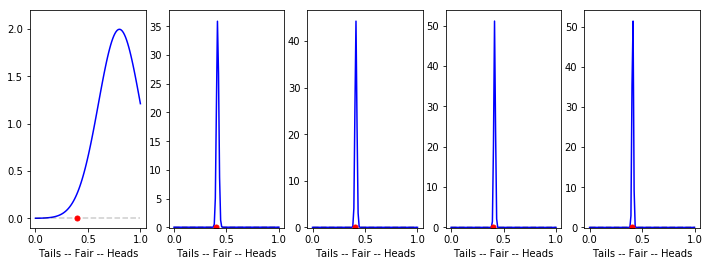

In [27]:
# Uncomment one of these lines to select a prior (initial votes for all hypotheses)
# prior = 2 - stats.norm.pdf(biases,true_bias,.2) # "Upside down" around true bias. A kind of worst case
prior = stats.norm.pdf(biases,.8,.2) # Gaussian around .5
# prior = stats.uniform.pdf(biases) # Uniform


num_iterations = 5 # Iterations of Bayesian update. TODO: Allow for grid
n_flips = 1000 # Number of coin flips at each iteration

fig = plt.gcf()
fig.set_size_inches(12,4)

# Do num_iterations of Bayesian update
for i in range(num_iterations):
    
    # Flip the coin n_flips times.
    flips = stats.bernoulli.rvs(true_bias, size=n_flips)
    num_heads = flips.sum()
    
    # Compute the likelihood.  p(D|H) 
    likelihood = stats.binom.pmf(num_heads, n_flips, biases)
    
    # Increment subplot
    ax = plt.subplot(1, num_iterations, i+1)

    # Plot initial prior: p(H)
    if i == 0:
        plt.plot(biases,prior,'b')

    # Bayes! Compute posterior: p(H|D) = p(H)p(D|H)/p(E)
    posterior = (prior*likelihood)/np.trapz(prior*likelihood,biases)

    # Plot posterior
    if (i > 0):
        plt.plot(biases,posterior, 'b')

    # Plot the true bias
    plt.plot([0,1],[0,0],'k--', alpha=.2)
    plt.plot(true_bias, 0, '.r', markersize=10)
    # How in love will you be 
    plt.xlabel("Tails -- Fair -- Heads")

    # Hack to get extra padding
    ymax = ax.get_ylim()[1]
    ax.set_ylim([-.1,ymax + .1])

    # Set the prior for the next iteration to be the curent posterior
    prior = posterior 
